# Support Vector Machines

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

plt.rcParams["figure.dpi"] = 100

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [2]:
def plot_classf_model(X, y, model, ax, title=None):
    """
    Contourplot a two-class underlying model, and test datapoints.
    
    Paramters
    ---------
    X: Matrix(mxn, R)
        Matrix of feature vectors with examples
    y: n-dimensional vector 
        Actual classes for each of the 'm' provided examples.
    """
    step, epsilon = 0.01, 0.1
    xx, yy = np.meshgrid(np.arange(X[:,0].min() - epsilon, X[:,0].max() + epsilon, step),
                         np.arange(X[:,1].min() - epsilon, X[:,1].max() + epsilon, step))

    preds = model.predict(np.c_[xx.ravel(), yy.ravel()])
    preds = preds.reshape(xx.shape)

    ax.pcolormesh(xx, yy, preds, cmap=cmap_light)
    ax.scatter(*X.T, c=y, s=20, edgecolor="k", cmap=cmap_bold)
    if title is not None:
        ax.set_title(title)

In [92]:
# Training an SVM classifier tho distinguish
# whether an instance of the dataset is Iris-Virginica
# or not. We consider the variables petal length and,
# petal width
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]
y = (iris["target"] == 2).astype(np.float64)

svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
))

svm_clf.fit(X, y)

svm_clf.predict([[5.5, 1.7]])

array([ 1.])

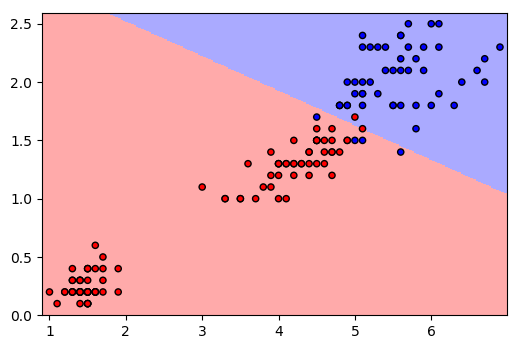

In [93]:
fig = plt.figure()
ax = fig.add_subplot(111)
plot_classf_model(X, y, svm_clf, ax)

### Polynomial Kernel (The efficient way) 
**Implements the *kernel trick***

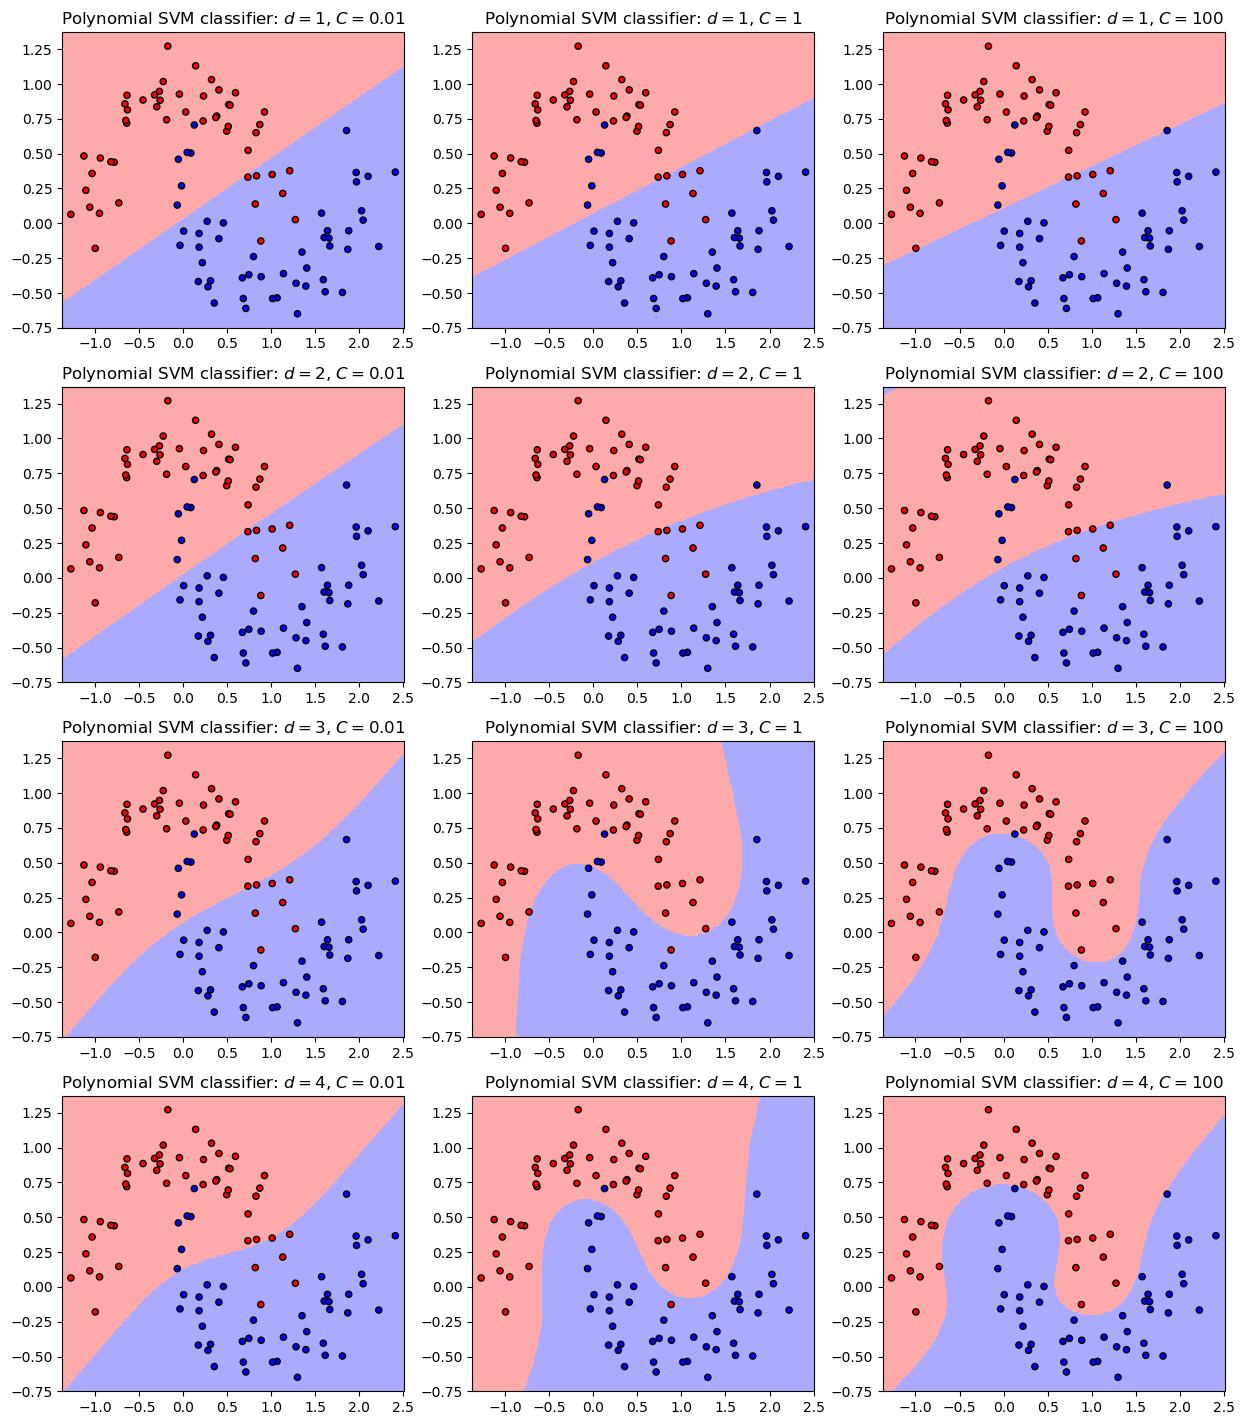

In [140]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from itertools import product

moons = datasets.make_moons(noise=0.15, random_state=42)
X, y = moons

fig = plt.figure(figsize=(15,18))
C = [0.01, 1, 100]
ixplot = 1
for i, pair in enumerate(product(range(1, 5), C)):
    d, c = pair
    ax = fig.add_subplot(4, 3, i + 1)
    poly_svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=d, C=c, coef0=1))
    ))

    poly_svm_clf.fit(X, y)

    plot_classf_model(X, y, poly_svm_clf, ax,
                     f"Polynomial SVM classifier: $d={d}$, $C={c}$")
plt.show()

### Gaussian Radial Basis Function (RBF)

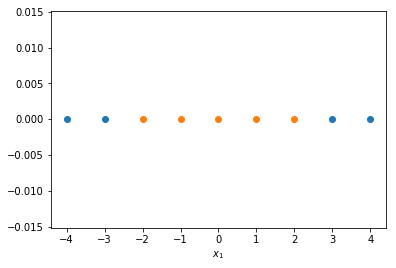

In [24]:
c1 = np.array([-4, -3, 3, 4])
c2 = np.array([-2, -1, 0, 1, 2])

plt.scatter(c1, np.zeros_like(c1))
plt.scatter(c2, np.zeros_like(c2))
plt.xlabel("$x_1$");

In [5]:
def rbf(gamma, landmark, X):
    return np.exp(-gamma * (X - landmark) ** 2)

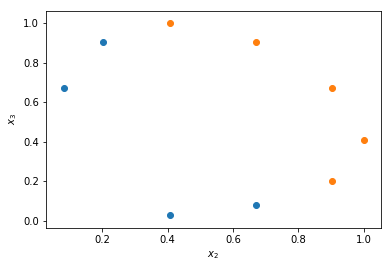

In [28]:
gamma = 0.1
plt.scatter(rbf(gamma, 1, c1), rbf(gamma, -2, c1))
plt.scatter(rbf(gamma, 1, c2), rbf(gamma, -2, c2))
plt.xlabel("$x_2$"); plt.ylabel("$x_3$");

## Exercises

**What is the fundamental idea behind Suport Vector Machines?**

Given a two-class dataset, the main idea is to find the *widest* possible street that separates both classes.

**What is a support vector?**

The support vector of an SVM are the *edge* of the street that separate both classes.

**Why is it important to scale the features when using SVMs?**

SVMs are sensible to feature scaling.

**Can an SVM classifer output a confidence score when it classifies an instance? What about a probability?**

No, the class predicted by an SVM is soley dictated by the values outside the street

**Can an SVM classifer output a confidence score when it classifies an instance? What about a probability?**

No, the class predicted by an SVM is soley dictated by the values outside the street

**Should you use the primal or the dual form of the SVM problem to train a model on a training set with millions of instances and hundreds of features?**

The primal form of the SVM should be used, this is because the number of instances is greater than the number of features. The dual form of the SVM should be used whenever the number of features is greater than the number of instances. 

**Say you trained an SVM classifier with an RBF kernel. It seems to underfit the training set: should you increase or decrease $\gamma$ (gamma)? What about $C$?**

We increase $\gamma$, reduce $C$.

**Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model**

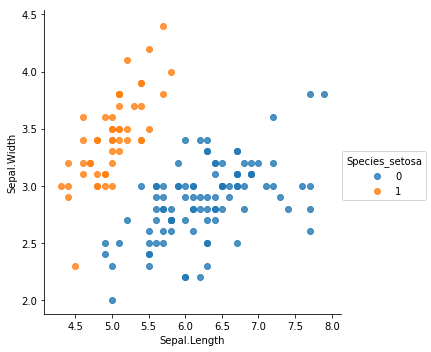

In [3]:
from pydataset import data
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import get_dummies

iris = get_dummies(data("iris"))
sns.lmplot("Sepal.Length", "Sepal.Width", iris, hue="Species_setosa", fit_reg=False);

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

X = iris[["Sepal.Length", "Sepal.Width"]].values
y = iris["Species_setosa"].values

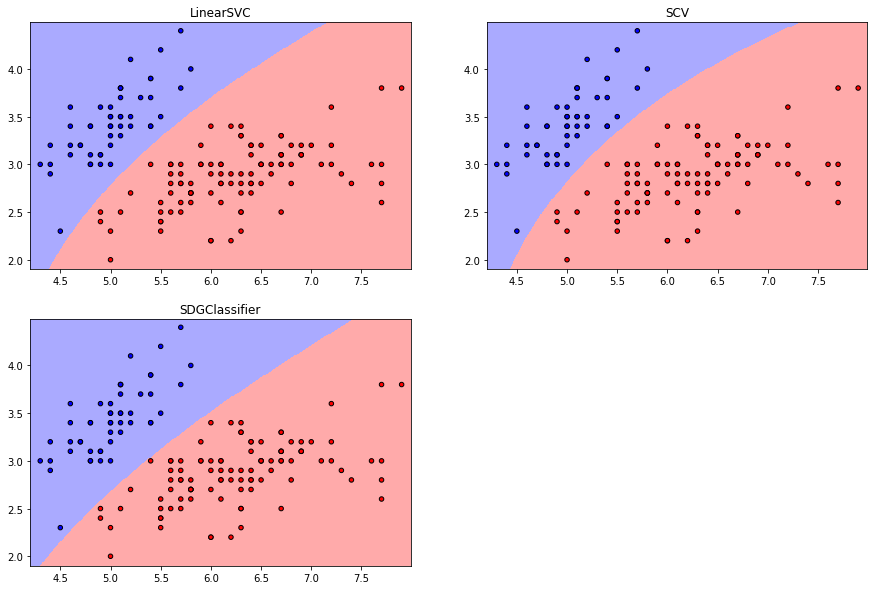

In [34]:
lin_svm = Pipeline((
        ("poly_feats", PolynomialFeatures(degree=3)),
        ("scale", StandardScaler()),
        ("svm", LinearSVC(C=10, loss="hinge"))
)); lin_svm.fit(X, y)

kern_svc = Pipeline((
    ("scale", StandardScaler()),
    ("svm", SVC(kernel="poly", degree=3, C=10, coef0=50))
)); kern_svc.fit(X, y)


sgd_svm = Pipeline((
    ("poly_feats", PolynomialFeatures(degree=4)),
    ("scaler", StandardScaler()),
    ("svm", SGDClassifier(tol=1e-5, max_iter=100, penalty=None, random_state=42))
)); sgd_svm.fit(X, y)

titles = ["LinearSVC", "SCV", "SDGClassifier"]
svm_models = [lin_svm, kern_svc, sgd_svm]
fig = plt.figure(figsize=(15,10))
for i, (model, title) in enumerate(zip(svm_models, titles), 1):
    ax = fig.add_subplot(2, 2, i)
    plot_classf_model(X, y, model, ax, title)

**Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all 10 digits. You may want to tune the hyperparameters using small validation sets to speed up the process. What accuracy can you reach?**

In [2]:
from sklearn.datasets import fetch_mldata
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV

mnist = fetch_mldata("mnist")

X_train, y_train = mnist["data"][:60_000], mnist["target"][:60_000]
X_test, y_test = mnist["data"][60_000:], mnist["target"][60_000:]

In [3]:
poly_params = {
    "kernel": ["poly"],
    "degree": [2, 3, 4, 5],
    "C": [1, 10, 100]
}

svm_gsearch = GridSearchCV(SVC(), param_grid=poly_params, n_jobs=5, verbose=1)
svm_gsearch.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=5)]: Done  36 out of  36 | elapsed: 61.1min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=5,
       param_grid={'kernel': ['poly'], 'degree': [2, 3, 4, 5], 'C': [1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)